## EDA
### Service Usage & Product Impact Analysis

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the cleaned data
df = pd.read_csv("../data/processed/cleaned_telco_customer_churn.csv")

print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. How does churn vary by internet service type (DSL, Fiber, No Internet)?


In [3]:
## Churn rate of customers based on internet service
internet_service_wise_churn_rate = df.groupby(by='InternetService')['Churn'].value_counts(normalize=True).round(2).to_frame()
internet_service_wise_churn_rate

proportion
InternetService Churn            
DSL             No           0.81
                Yes          0.19
Fiber optic     No           0.58
                Yes          0.42
No              No           0.93
                Yes          0.07

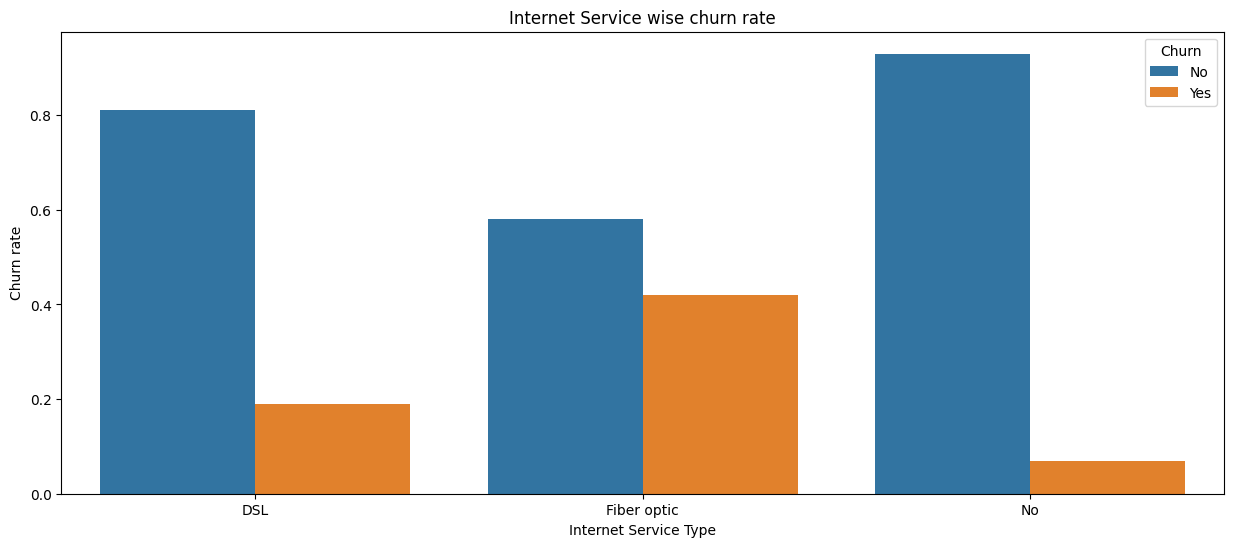

In [4]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=internet_service_wise_churn_rate, x='InternetService', y='proportion', hue='Churn')
plt.title('Internet Service wise churn rate')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
Internet service with **Fiber optic** has the highest churn rate of approximately **42%**, followed by DSL at around 19%. Customers without internet service have the lowest churn rate of about 7%. This suggests that the type of internet service may influence customer retention, with Fiber optic users being more prone to churn.

### 2. Do customers with fiber optic internet churn more?
Yes, and it's percentage is 42% as analyzed above.

### 3. How do additional services (OnlineSecurity, TechSupport, Streaming, ...) impact churn?


In [5]:
additional_services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace Yes with 1 and other with 0
for service in additional_services:
    df[service]=df[service].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
## Impact on churn rate by each additional services
data = []
for service in additional_services:
    service_wise_churn_rate_for_yes = df.groupby(by=service)['Churn'].value_counts(normalize=True).round(2).unstack()['Yes']
    data.append({'Service':service, 'Has Service':service_wise_churn_rate_for_yes.index.values[0], 'Churn Rate':service_wise_churn_rate_for_yes.values[0]})
    data.append({'Service':service, 'Has Service':service_wise_churn_rate_for_yes.index.values[1], 'Churn Rate':service_wise_churn_rate_for_yes.values[1]})

service_table = pd.DataFrame(data)
service_table

,Service,Has Service,Churn Rate
0,PhoneService,0,0.25
1,PhoneService,1,0.27
2,MultipleLines,0,0.25
3,MultipleLines,1,0.29
4,OnlineSecurity,0,0.31
5,OnlineSecurity,1,0.15
6,OnlineBackup,0,0.29
7,OnlineBackup,1,0.22
8,DeviceProtection,0,0.29
9,DeviceProtection,1,0.23


In [7]:
## How much each individual service impacts (reduces/increases) the churn rate after activating it
churn_rate_diff = []
for i in range(0,16,2):
    diff = (service_table.iloc[i+1, :]['Churn Rate'] - service_table.iloc[i, :]['Churn Rate']).round(2)
    churn_rate_diff.append({'Service':service_table.iloc[i, :]['Service'],'ChurnRateIncrement':diff})
churn_rate_diff_df = pd.DataFrame(churn_rate_diff).sort_values(by=['ChurnRateIncrement'], ascending=False)
churn_rate_diff_df

,Service,ChurnRateIncrement
6,StreamingTV,0.06
7,StreamingMovies,0.06
1,MultipleLines,0.04
0,PhoneService,0.02
4,DeviceProtection,-0.06
3,OnlineBackup,-0.07
2,OnlineSecurity,-0.16
5,TechSupport,-0.16


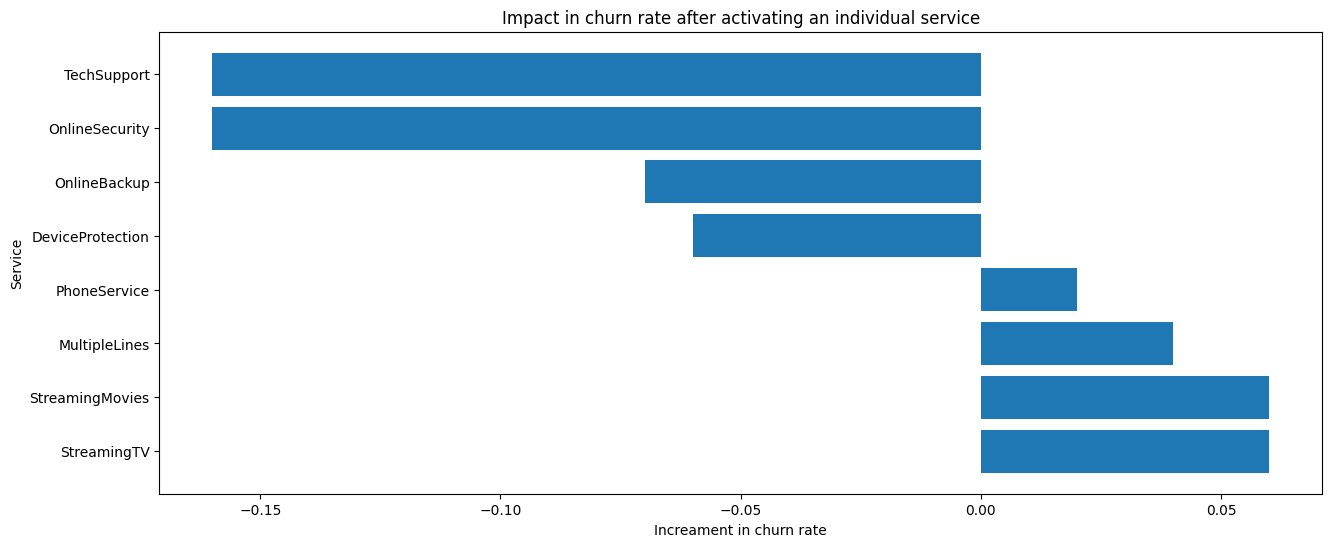

In [8]:
## Visualize the impact in churn rate after activating an individual service
plt.figure(figsize=(15,6))
plt.barh(y=churn_rate_diff_df['Service'], width=churn_rate_diff_df['ChurnRateIncrement'])
plt.title("Impact in churn rate after activating an individual service")
plt.xlabel('Increament in churn rate')
plt.ylabel('Service')
plt.show()

#### Comment:
So, there are some additional services that impact churn significantly:
* Services like **tech support, online security** and **online backup** etc **decrease** churn rate after activation.
* On the other hand, services like **streaming TV** and **streaming movies** **increase** churn rate after activation.

### 4. Which services act as churn reducers?
From above analysis, it is clear that services like **Tech Support**, **Online Security**, **Online Backup**, and **Device Protection** act as churn reducers.

### 5. Are customers with multiple services less likely to churn?
Anlysis the impact on churn rate by multiple services subscribed.

In [9]:
df['TotalServices'] = df[additional_services].sum(axis=1)
churn_rate = (df.groupby(['TotalServices'])['Churn']
              .apply(lambda x: ((x=='Yes').mean()*100).round(2))
              .reset_index(name='Churn_Rate')
              )
churn_rate

,TotalServices,Churn_Rate
0,0,43.75
1,1,21.17
2,2,32.83
3,3,36.48
4,4,31.38
5,5,25.61
6,6,22.50
7,7,12.44
8,8,5.31


<Figure size 1500x600 with 0 Axes>

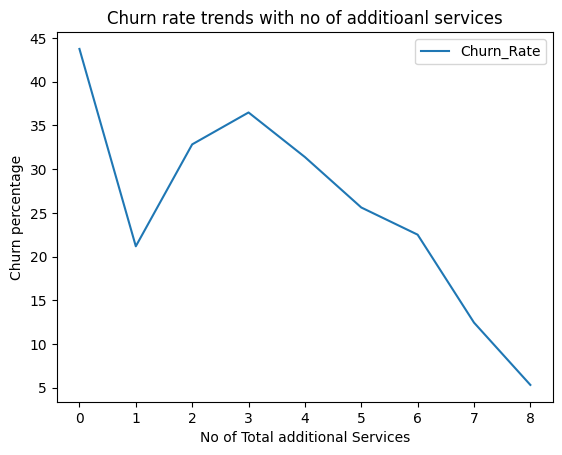

In [10]:
## Visualize the churn rate trends with no of multiple services
plt.figure(figsize=(15,6))
churn_rate.plot(kind='line', x='TotalServices', y='Churn_Rate')
plt.title("Churn rate trends with no of additioanl services")
plt.xlabel('No of Total additional Services')
plt.ylabel('Churn percentage');

#### Comment:
From the abobe graph it is clear that customers churn rate gradually decreases as we add multiple services. But you should take decision carefully as adding more services may also increase the cost for customers which may lead to churn.

### 6. Best Bundled services

#### Rule for finding the best bundled services:
The following table outlines the criteria used to identify the most effective bundled services that minimize churn while maintaining customer satisfaction and profitability.

| Filter     | Rule                |
| ---------- | ------------------- |
| Churn rate    |  ≤ 15–20%            |
| Customers  | ≥ 100               |
| Complexity | ≤ 3 services        |


In [11]:
## We already have calculate the churn reduction table based on individual additional service
churn_rate_diff_df

,Service,ChurnRateIncrement
6,StreamingTV,0.06
7,StreamingMovies,0.06
1,MultipleLines,0.04
0,PhoneService,0.02
4,DeviceProtection,-0.06
3,OnlineBackup,-0.07
2,OnlineSecurity,-0.16
5,TechSupport,-0.16


#### Comment:
It is clear that additional services like **Online Security, Tech Support, Online Backup and Device Protection** are the actual churn reducers. So, bundling these services with **Internet service** can be bundled to reduce churn.

In [12]:
## Effective Bundeled services
service_to_bundle = ["InternetService", "OnlineSecurity", "TechSupport", "OnlineBackup", "DeviceProtection"]

bundled_service_wise_churn = df.groupby(by=service_to_bundle)['Churn'].value_counts().unstack().reset_index()
bundled_service_wise_churn['ChurnRate'] = (bundled_service_wise_churn['Yes']/((bundled_service_wise_churn['Yes']+bundled_service_wise_churn['No']))*100).round(2)
bundled_service_wise_churn['Customers'] = (bundled_service_wise_churn['Yes']+bundled_service_wise_churn['No'])
bundled_service_wise_churn['TotalServices'] = bundled_service_wise_churn[service_to_bundle[1:]].sum(axis=1)+1
bundled_service_wise_churn

Churn,InternetService,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,No,Yes,ChurnRate,Customers,TotalServices
0,DSL,0,0,0,0,240,179,42.72,419,1
1,DSL,0,0,0,1,82,47,36.43,129,2
2,DSL,0,0,1,0,117,39,25.00,156,2
3,DSL,0,0,1,1,70,13,15.66,83,3
4,DSL,0,1,0,0,99,33,25.00,132,2
5,DSL,0,1,0,1,97,14,12.61,111,3
6,DSL,0,1,1,0,89,16,15.24,105,3
7,DSL,0,1,1,1,99,5,4.81,104,4
8,DSL,1,0,0,0,126,34,21.25,160,2
9,DSL,1,0,0,1,80,8,9.09,88,3


In [13]:
## Create data frame to find best services
bundle_data = []
for i in bundled_service_wise_churn.index:
    bundle_service_list = [bundled_service_wise_churn.iloc[i,:]["InternetService"]] + [x for x in bundled_service_wise_churn.iloc[i,:].iloc[1:5].index if bundled_service_wise_churn.iloc[i,:][x]==1]
    bundle_service = " + ".join(bundle_service_list)
    bundle_data.append({"Bundle":bundle_service, 'Services':bundled_service_wise_churn.iloc[i,:]['TotalServices'], 'Churn':bundled_service_wise_churn.iloc[i,:]['ChurnRate'], 'Customers':bundled_service_wise_churn.iloc[i,:]['Customers']})

bundle_service_df = pd.DataFrame(data=bundle_data)
bundle_service_df

,Bundle,Services,Churn,Customers
0,DSL,1,42.72,419
1,DSL + DeviceProtection,2,36.43,129
2,DSL + OnlineBackup,2,25.00,156
3,DSL + OnlineBackup + DeviceProtection,3,15.66,83
4,DSL + TechSupport,2,25.00,132
5,DSL + TechSupport + DeviceProtection,3,12.61,111
6,DSL + TechSupport + OnlineBackup,3,15.24,105
7,DSL + TechSupport + OnlineBackup + DeviceProte...,4,4.81,104
8,DSL + OnlineSecurity,2,21.25,160
9,DSL + OnlineSecurity + DeviceProtection,3,9.09,88


In [14]:
## Filter the data frame for findout best service
service_bundle_mask = (bundle_service_df['Churn']<=15) & (bundle_service_df['Customers']>=100) & (bundle_service_df['Services']<=3)
bundle_service_df[service_bundle_mask]

,Bundle,Services,Churn,Customers
5,DSL + TechSupport + DeviceProtection,3,12.61,111
12,DSL + OnlineSecurity + TechSupport,3,11.81,127
32,No,1,7.44,1519


#### Comment:
Based on the defined criteria for identifying the best bundled services, the analysis reveals that the following service combinations meet the requirements:
1. **DSL + OnlineSecurity + TechSupport** with churn rate of 11.81% and customers count of 127
2. **DSL + TechSupport + DeviceProtection**	with churn rate of 12.61% and customers count of 111

---
### 👨‍💻 Author Information
**Name:** [Amaresh Maity]  
**Date:** 2026-01-07  
**Role:** [Data Scientist | AI Engineer]



#### Let's Connect!

If you have questions about this analysis or would like to collaborate, feel free to reach out:

* **LinkedIn:** [LinkedIn](https://www.linkedin.com/in/amareshmaity/)
* **GitHub:** [@amareshmaity](https://github.com/amareshmaity)
* **Email:** [contacttoamaresh@gmail.com](mailto:contacttoamaresh@gmail.com)


